In [ ]:
import pandas as pd

# Doğru ayırıcı ile oku
df = pd.read_csv("variable_strawberry.csv", encoding="ISO-8859-9", sep=";")

# Sütun adlarını düzelt
df.columns = df.columns.str.strip()
df["Treatment"] = df["Treatment"].str.replace("*", "", regex=False).str.strip()

# İlk 5 satırı kontrol
print(df.head())


  Treatment Total number of fruits  (fruits/plant) Total fresh mass (g/plant)  \
0    V1B1D1                                  32,25                     322,00   
1    V1B2D1                                  33,50                     400,75   
2    V1B3D1                                  33,50                     330,00   
3    V1B4D1                                  33,08                     350,92   
4    V1B1D2                                  25,75                     231,75   

  Comercial number of fruits (fruits/plant)  \
0                                     30,00   
1                                     32,00   
2                                     33,25   
3                                     31,75   
4                                     25,00   

  Comercial mass fresh  (Fruits/ plant) Diameter (cm) Lenght (cm)  \
0                                317,50          2,51        2,90   
1                                388,25          2,65        3,16   
2                      

In [ ]:
# 1. Gereksiz unnamed sütunları temizle
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 2. Sütun adlarını sadeleştir (boşlukları alt çizgi yap, küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# 3. Treatment sütununu düzelt
df["treatment"] = df["treatment"].str.replace("*", "", regex=False).str.strip()

# 4. Kontrol: yeni sütun adları
print(df.columns.tolist())


['treatment', 'total_number_of_fruits__fruits/plant', 'total_fresh_mass_g/plant', 'comercial_number_of_fruits_fruits/plant', 'comercial_mass_fresh__fruits/_plant', 'diameter_cm', 'lenght_cm', 'total_solids_solubles_tss_ºbrix', 'total_yield_kg/m2', 'comercial_yield__kg/m2']


<ipython-input-5-cf542942257e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["treatment"] = df["treatment"].str.replace("*", "", regex=False).str.strip()


In [ ]:
# Çeşit etiketini V1, V2... olarak çıkar
df["label"] = df["treatment"].str.extract(r"(?i)(v\d)", expand=False).str.upper()

# Sınıf dağılımına bakalım
print(df["label"].value_counts())


label
V1    13
V2    12
V4    12
V6    12
V5    12
V7    12
V3    11
Name: count, dtype: int64


In [ ]:
# Özellikleri X, etiketleri y olarak ayır
X = df.drop(columns=["treatment", "label"])
y = df["label"]


In [ ]:
# Sadece sayısal sütunları hedef al
for col in X.columns:
    X[col] = X[col].str.replace(",", ".", regex=False)
    X[col] = X[col].astype(float)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("=== Sınıflandırma Raporu ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Sınıflandırma Raporu ===
              precision    recall  f1-score   support

          V1       0.80      1.00      0.89         4
          V2       0.50      0.50      0.50         4
          V3       0.50      1.00      0.67         3
          V4       0.00      0.00      0.00         3
          V5       0.75      0.75      0.75         4
          V6       0.00      0.00      0.00         4
          V7       0.67      0.50      0.57         4

    accuracy                           0.54        26
   macro avg       0.46      0.54      0.48        26
weighted avg       0.48      0.54      0.49        26

=== Confusion Matrix ===
[[4 0 0 0 0 0 0]
 [0 2 2 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 1 0 0 1 1 0]
 [1 0 0 0 3 0 0]
 [0 0 1 2 0 0 1]
 [0 1 0 1 0 0 2]]


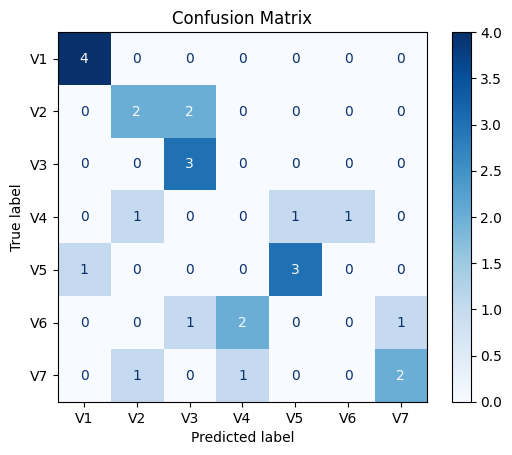

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Veri setini doğru ayırıcıyla ve Türkçe karakter uyumlu şekilde oku
df = pd.read_csv("variable_strawberry.csv", encoding="ISO-8859-9", sep=";")

# Sütun adlarını temizle:
# - küçük harfe çevir
# - boşlukları alt çizgiyle değiştir
# - parantezleri kaldır
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Excel'den kalan boş (unnamed) sütunlar varsa onları kaldır
df = df.loc[:, ~df.columns.str.contains("unnamed")]

# Treatment sütunundaki "*" karakterini temizle
df["treatment"] = df["treatment"].str.replace("*", "", regex=False).str.strip()


In [ ]:
# Verim sütunundaki sayılar aslında string , bunu düzeltmemiz gerekiyor.
# Virgülü noktaya çeviriyoruz, sonra float veri tipine dönüştürüyoruz.
df["verim"] = df["total_number_of_fruits__fruits/plant"].str.replace(",", ".").astype(float)

# Verim değerlerinin medyanını buluyoruz.
# Bu değeri eşik (threshold) olarak kullanacağız.
threshold = df["verim"].median()

# Yeni bir etiket sütunu (label) oluşturuyoruz:
# Verimi eşikten büyük olanları "High", küçük olanları "Low" olarak etiketliyoruz.
df["label"] = df["verim"].apply(lambda x: "High" if x > threshold else "Low")

# Etiketlerin kaçar tane olduğunu görelim
print(df["label"].value_counts())


label
Low     43
High    41
Name: count, dtype: int64


In [ ]:
# Hedef sütunları çıkar
X = df.drop(columns=["treatment", "label"])

# Tüm sütunları tek tek kontrol ederek işlem yap
for col in X.columns:
    if X[col].dtype == "object":
        # Eğer sütun string ise: virgül → nokta
        X[col] = X[col].str.replace(",", ".")
    # Sonuç ne olursa olsun float'a dönüştür
    X[col] = X[col].astype(float)

# Etiket sütunu
y = df["label"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Veriyi eğitim ve test olarak ikiye ayır
# stratify=y → High/Low oranı her iki grupta da aynı kalsın
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Sayısal veriler farklı aralıklarda olabilir
# Bu yüzden tüm verileri ortalaması 0, standart sapması 1 olacak şekilde dönüştürüyoruz
scaler = StandardScaler()

# Eğitim verisini fit (öğren) + transform (dönüştür)
X_train_scaled = scaler.fit_transform(X_train)

# Test verisini sadece transform et (fit yok!)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# SVM modelini tanımlıyoruz
# kernel="rbf"
# C=1.0: hata toleransı (çok yüksek olursa overfitting yapabilir)
# gamma="scale"
model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Modeli eğitim verisi ile eğitiyoruz
model.fit(X_train_scaled, y_train)

# Modeli test verisiyle tahmin ettiriyoruz
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# classification_report çıktısını sözlük olarak al
report = classification_report(y_test, y_pred, output_dict=True)

# Pandas DataFrame'e çevir
report_df = pd.DataFrame(report).transpose()

# Görüntüle
print(report_df)


              precision  recall  f1-score  support
High                1.0     1.0       1.0     13.0
Low                 1.0     1.0       1.0     13.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     26.0
weighted avg        1.0     1.0       1.0     26.0


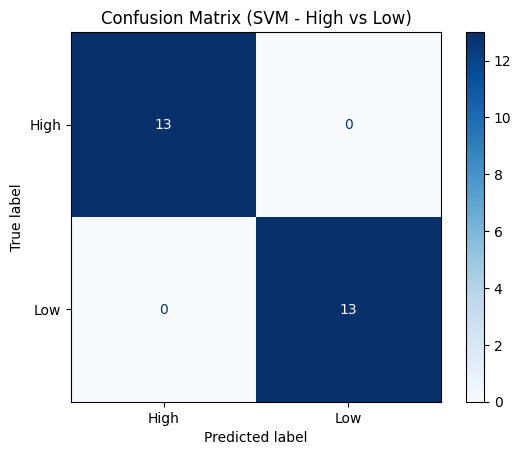

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix görselini oluştur
ConfusionMatrixDisplay.from_estimator(
    model,             # eğittiğimiz model
    X_test_scaled,     # test verisi
    y_test,            # gerçek etiketler
    cmap="Blues",
    display_labels=["High", "Low"]
)


plt.title("Confusion Matrix (SVM - High vs Low)")
plt.grid(False)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Çapraz doğrulama: 5 parçalı (fold) test
# accuracy: her turda doğruluk hesaplar
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")

# Sonuçları yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", scores)
print("Ortalama Doğruluk:", scores.mean())
print("Standart Sapma:", scores.std())


Çapraz Doğrulama Doğruluk Skorları: [0.82352941 0.94117647 0.88235294 0.88235294 1.        ]
Ortalama Doğruluk: 0.9058823529411765
Standart Sapma: 0.05998846486579749


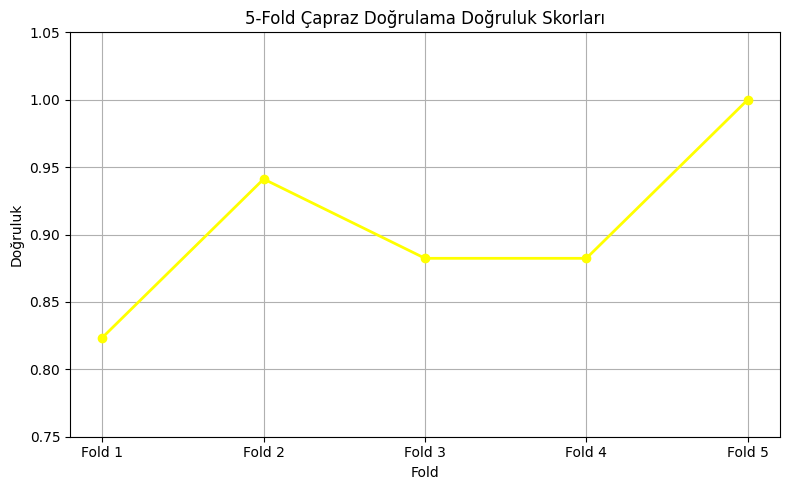

In [2]:
import matplotlib.pyplot as plt

# Çapraz doğrulama doğruluk skorları
scores = [0.82352941, 0.94117647, 0.88235294, 0.88235294, 1.0]
folds = [f'Fold {i+1}' for i in range(5)]

# Grafik oluşturma
plt.figure(figsize=(8, 5))
plt.plot(folds, scores, marker='o', linewidth=2, color='yellow')
plt.ylim(0.75, 1.05)
plt.title('5-Fold Çapraz Doğrulama Doğruluk Skorları')
plt.xlabel('Fold')
plt.ylabel('Doğruluk')
plt.grid(True)
plt.tight_layout()
plt.show()


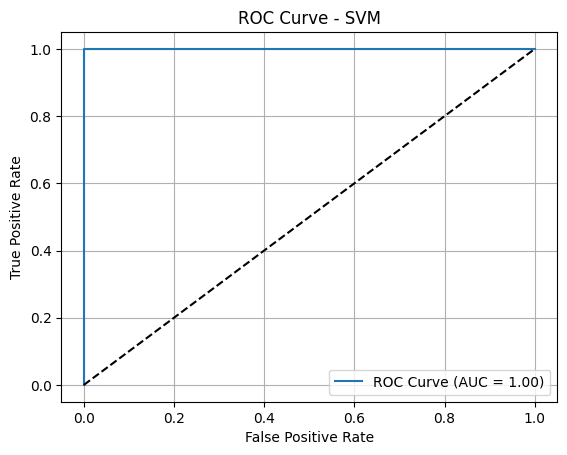

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Etiketleri sayıya çevir (High = 1, Low = 0 gibi)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Modelin tahmin gücünü ölçmek için decision function kullanıyoruz
y_scores = model.decision_function(X_test_scaled)

# ROC eğrisi için false positive rate ve true positive rate hesapla
fpr, tpr, thresholds = roc_curve(y_test_bin, y_scores)

# Alan altı (AUC) = modelin ayrım gücü
roc_auc = auc(fpr, tpr)

# Çizim
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # rastgele sınıflandırma çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Denenecek parametreler
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# GridSearchCV objesini oluştur
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğitimi başlat
grid_search.fit(X_scaled, y)

# En iyi parametreleri ve skorları yazdır
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Doğruluk:", grid_search.best_score_)


En İyi Parametreler: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
En İyi Doğruluk: 0.9764705882352942
